<a href="https://colab.research.google.com/github/triretno08/Praktikum7-Fuzzy-Cmeans/blob/main/Fuzzy_G_231_21_0182.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama: Tri Retno Utami

NIM : G.231.21.0182

In [1]:
!pip install scikit-fuzzy --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 12.0 MB/s eta 0:00:00


In [3]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from google.colab import files
uploaded = files.upload()

Saving UCI_Credit_Card.csv to UCI_Credit_Card.csv


In [17]:
base = pd.read_csv('UCI_Credit_Card.csv')
base.shape

(30000, 25)

In [18]:
base.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [19]:
base['BILL_TOTAL'] = base['BILL_AMT1'] + base['BILL_AMT2'] + base['BILL_AMT3'] + base['BILL_AMT4'] + base['BILL_AMT5'] + base['BILL_AMT6']

In [20]:
base.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month,BILL_TOTAL
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1,7704.0
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,17077.0
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,101653.0
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,231334.0
4,5,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0,109339.0


In [21]:
X = base.iloc[:,[1,25]].values

In [22]:
X

array([[ 20000.,   7704.],
       [120000.,  17077.],
       [ 90000., 101653.],
       ...,
       [ 30000.,  70496.],
       [ 80000., 266611.],
       [ 50000., 230874.]])

In [23]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [24]:
X

array([[-1.13672015, -0.69069198],
       [-0.3659805 , -0.66599747],
       [-0.59720239, -0.44316987],
       ...,
       [-1.05964618, -0.52525745],
       [-0.67427636, -0.00856436],
       [-0.90549825, -0.10271861]])

In [25]:
X.shape

(30000, 2)

In [26]:
X.T.shape

(2, 30000)

In [29]:
import skfuzzy

In [30]:
r = skfuzzy.cmeans(data = X.T, c = 3, m = 2, error=0.005, maxiter=1000, init=None)

In [31]:
r

(array([[ 0.74996405,  2.01657978],
        [ 0.97505533, -0.42055711],
        [-0.73894165, -0.3017121 ]]),
 array([[0.02591961, 0.02732288, 0.00499202, ..., 0.01491419, 0.01405682,
         0.00905929],
        [0.06226844, 0.12409626, 0.01587998, ..., 0.03497951, 0.02981408,
         0.01801142],
        [0.91181195, 0.84858086, 0.979128  , ..., 0.9501063 , 0.9561291 ,
         0.9729293 ]]),
 array([[0.55034786, 0.28779882, 0.19613871, ..., 0.41723655, 0.30014673,
         0.10143601],
        [0.39225321, 0.36888598, 0.39544732, ..., 0.16470723, 0.18293696,
         0.27498113],
        [0.05739892, 0.3433152 , 0.40841397, ..., 0.41805622, 0.51691632,
         0.62358286]]),
 array([[3.29983297, 2.90543507, 2.80450098, ..., 3.12019642, 2.47581694,
         2.6892343 ],
        [2.12898298, 1.36331144, 1.57242033, ..., 2.03739354, 1.70000972,
         1.90722393],
        [0.55635697, 0.52134811, 0.20025063, ..., 0.390927  , 0.30019527,
         0.25949858]]),
 array([25997.855342

In [32]:
previsoes_porcentagem = r[1]

In [33]:
previsoes_porcentagem

array([[0.02591961, 0.02732288, 0.00499202, ..., 0.01491419, 0.01405682,
        0.00905929],
       [0.06226844, 0.12409626, 0.01587998, ..., 0.03497951, 0.02981408,
        0.01801142],
       [0.91181195, 0.84858086, 0.979128  , ..., 0.9501063 , 0.9561291 ,
        0.9729293 ]])

In [34]:
previsoes_porcentagem[0][0]

0.025919608601032835

In [38]:
previsoes_porcentagem[1][0]

0.06226843858511784

In [39]:
previsoes_porcentagem[2][0]

0.9118119528138493

In [40]:
previsoes_porcentagem[0][0] + previsoes_porcentagem[1][0] + previsoes_porcentagem[2][0]

1.0

In [41]:
previsoes = previsoes_porcentagem.argmax(axis=0)

In [42]:
previsoes

array([2, 2, 2, ..., 2, 2, 2])

In [43]:
previsoes[5000]

2

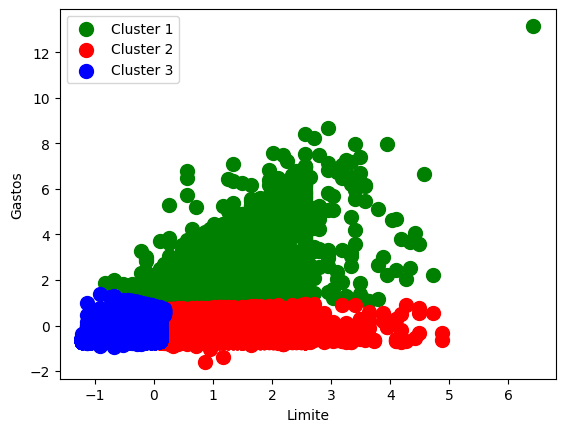

In [44]:
plt.scatter(X[previsoes==0,0], X[previsoes==0,1], s = 100, c = 'green', label = 'Cluster 1')
plt.scatter(X[previsoes==1,0], X[previsoes==1,1], s = 100, c = 'red', label = 'Cluster 2')
plt.scatter(X[previsoes==2,0], X[previsoes==2,1], s = 100, c = 'blue', label = 'Cluster 3')
plt.xlabel('Limite')
plt.ylabel('Gastos')
plt.legend();